# Previously...

In [1]:
import atoti as tt
from utils import setup

In [2]:
# instantiating our instance and creating the Atoti cube with our data
session, cube = setup.create_app(ses_name="training3", port=9094)
setup.nb2_measures(cube)
setup.nb3_measures(cube)
# aliasing cube properties
h, l, m = cube.hierarchies, cube.levels, cube.measures

/Users/aya/Desktop/atoti/.venv/lib/python3.11/site-packages/atoti/session.py:468: RuntimeWarning: The license key is about to expire, contact ActiveViam to get a new license key in the coming 5 days.
  session._warn_if_license_about_to_expire()


# Structuring the story

This is where we put together everything we have learned to create our story.  

Let's do a quick recap of what we've done so far:  
- "Who" and "What" defined our audiences and set the premise of our story based on their needs and interests.  
- "When" and "Where" set the context in terms of time periods and filter our queries to focus on relevant data points. 
- "How" helped decisions concerning the story's presentation with different data visualization tools.  

In this section, we are going to structure our story and use the "Why" question to help us keep the story trim and relevant.

Let's work to create a story around the below objective:  

> Our retailer wants to reduce costs and increase profit. 

We try to use the following points to help us structure our story:
- [1. Introduction: Provide a sense of what the data is about](#1.-Introduction:-Provide-a-sense-of-what-the-data-is-about)  
- [2. Characters: People/Entities that drive the story forward](#2.-Characters:-People/Entities-that-drive-the-story-forward)  
- [3. The Plot: Providing insights that drive decisions](#3.-The-Plot:-Providing-insights-that-drive-decisions)  
- [4. Conflict: Handle anomalies detected in data](#4.-Conflict:-Handle-anomalies-detected-in-data)
- [5. Conclusion: Predict what our audience will ask next](#5.-Conclusion:-Predict-what-our-audience-will-ask-next)

<div style="text-align: center;" ><a href="https://www.atoti.io/?utm_source=gallery&utm_content=03-storytelling" target="_blank" rel="noopener noreferrer"><img src="https://data.atoti.io/notebooks/banners/Discover-Atoti-now.png" alt="Try atoti"></a></div>

## 1. Introduction: Provide a sense of what the data is about  

Most often our audience will walk themselves through our reports and discover insight on their own.  They won't have the benefit of having a live presentation of the findings. With this in mind, we can make use of the dashboard title, page, and widget labels to give them an idea of what they are looking at. Labeling and signposting data is an often overlooked part of report preparation and data treatment.

In this example, our audience will know that they can get the breakdown of the profit based on the title "Profit breakdown".  

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
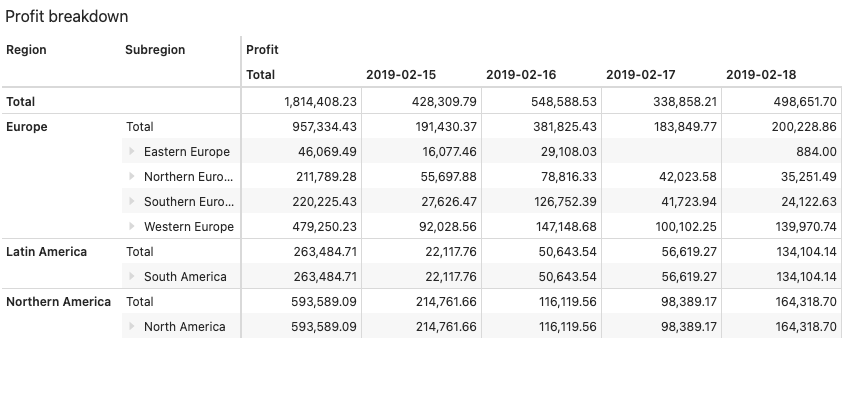

In [3]:
session.widget

Click on the below link to open the "Global Sales Analysis" dashboard.  

In [4]:
session.link / "#/dashboard/710"

http://localhost:9094/#/dashboard/710

The dashboard title shows that the story is about global sales analysis and the page itself is showing a summary of the sales.   

<img src="https://data.atoti.io/atoti-academy/images/storytelling-with-atoti/3_1_1_dashboard_labels.gif" width="1000px" />  

We have used three ways to introduce the data to our audience.

1. The dashboard has a clear title: `Global Sales Analysis`.
2. The page has a label: `Sales summary`.
3. A filter widget has been added to the page so that our audience can identify the data that concerns a particular region.

## 2. Characters: People/Entities that drive the story forward  

In our context, we can identify some of these "characters" that can affect our decisions:  

* **Products**: Which products do we currently list and sell?
* **Shippers**: Which shipper is the most used? Which shipper is the cheapest or most expensive?   
* **Customers**: Where are the customers located? How frequent do they make a purchase?  

Once we identify our "characters", we can craft our stories around them. We can neatly group analytics on the same "character" within a page. For instance, we can create a page that displays data about shipping companies only, and another that has a main focus on customers.

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
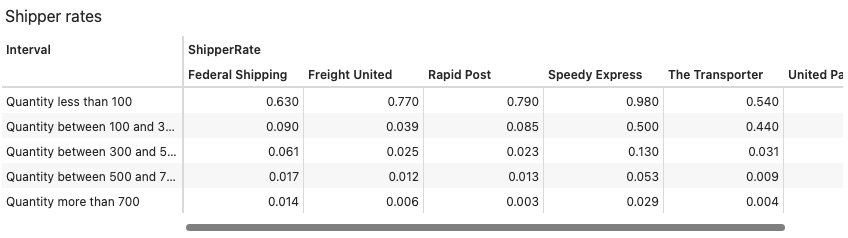

In [5]:
session.widget

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
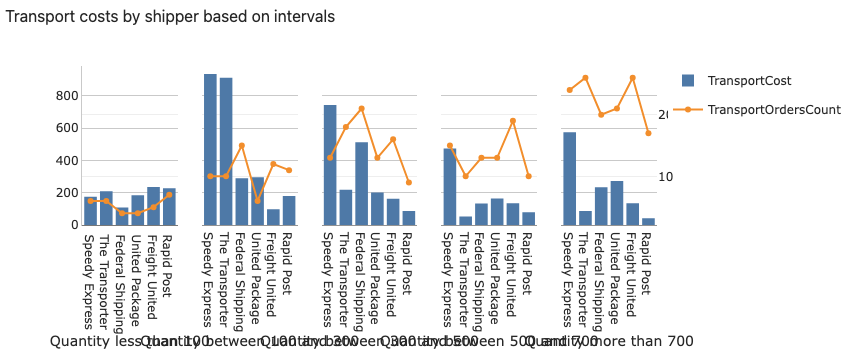

In [6]:
session.widget

## 3. The Plot: Providing insights that drive decisions  

### 3.1 Trimming plot with questions

Often, we go with our experience and sometimes our intuition when we put together a dashboard. But are they always relevant or placed in the correct segments?  

This is where we go back to our initial questioning to justify why we keep, discard or modify our visualizations. 
That's to say: 

* Why does our audience need this data?
* What benefit will our audience draw from this data? 
* How will this data help our audience find solutions to their business problems?
* Does our audience have all the data they need to make informed decisions? 

More precise questions will help assess the utility of a page layout, or the inclusion of a data visualization, or even the way the data is presented.
For instance, we can ask the following questions:  

* What will our audience do with the comparison between `TransportCost` and `TransportOrdersCount`? 
* Why is it important for our audience to see the Shipping rate table on this page/dashboard?  
* How does it help them to see data displayed by intervals instead of actual quantities? 

Drop, modify, or reposition the visualization as necessary.   

### 3.2 Simulating the possibilities  

> With hindsight we are all experts.

A simulation based on our real and actual data can be used to make informed decisions.
Let's imagine our audience is wondering how to save money, and wondering whether switching from one shipping company to another would actually generate real savings, or just extra paperwork and hassle for everyone.

To provide useful and insightful data, we will simulate the switching of the shipper "Speedy Express" to "Rapid Post" and see the amount of savings that we can potentially have by doing so.  We start by extracting the orders that were using "Speedy Express" and updating their `ShipperName` to "Rapid Post" **outside of Atoti**.  

In [7]:
orders_tbl = session.tables["Orders"]

shipper_df = (
    cube.query(
        m["QuantitySold.SUM"],
        m["SellingPricePerUnit"],
        levels=[
            l["OrderId"],
            l["ProductId"],
            l["OrderDate"],
            l["EmployeeId"],
            l["CustomerId"],
        ],
        filter=(l["ShipperName"] == "Speedy Express"),
    )
    .reset_index()
    .rename(columns={"QuantitySold.SUM": "QuantitySold"})
)

shipper_df["ShipperName"] = "Rapid Post"

shipper_df.head()

,OrderId,ProductId,OrderDate,EmployeeId,CustomerId,QuantitySold,SellingPricePerUnit,ShipperName
0,105,1462,2019-02-17,18680,c5419,293,35.15,Rapid Post
1,11,1176,2019-02-18,18680,c4859,551,8.91,Rapid Post
2,122,1124,2019-02-17,26584,c3515,849,13.43,Rapid Post
3,136,708,2019-02-17,18680,c1835,893,18.46,Rapid Post
4,139,1163,2019-02-17,18637,c5531,714,8.22,Rapid Post


In Atoti, we are able to load the modified dataset into the cube as a scenario. In this case, let's label our scenario as "Speedy Express > Rapid Post".  

In [8]:
orders_tbl.scenarios["Speedy Express > Rapid Post"].load(
    shipper_df[
        [
            "OrderId",
            "OrderDate",
            "QuantitySold",
            "SellingPricePerUnit",
            "ShipperName",
            "ProductId",
            "EmployeeId",
            "CustomerId",
        ]
    ]
)

Now, we are able to compare the scenario against the base (initial) and see the amount of savings we can have. And of course, we can present this data in different ways.  Here are three examples:

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
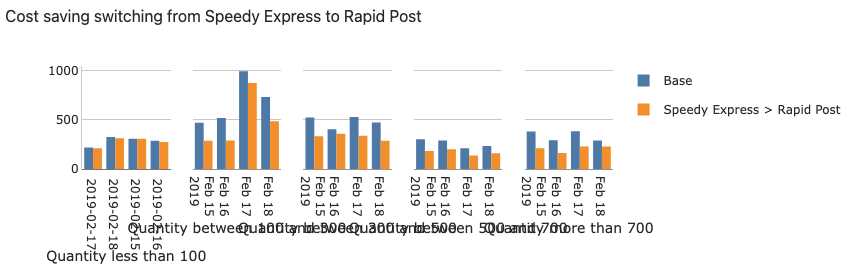

In [9]:
session.widget

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
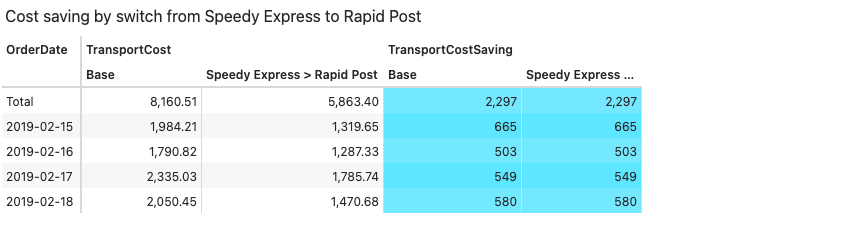

In [10]:
session.widget

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
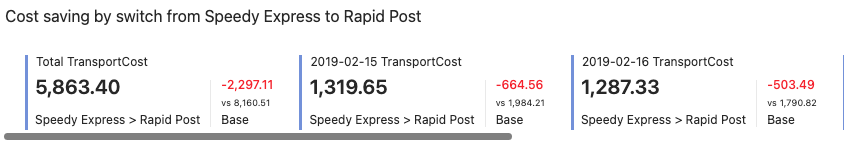

In [11]:
session.widget

### 📐Exercise  

Have a look at the three visualizations above and decide which you would include in a report.

### 📖 Solution

There are no right or wrong answers, but here are some guidelines.

* Graphical displays are easier to grasp in a glance compared to data presented in tables. In addition, as we are not going to drill down into the details of the savings, we can probably drop skip the pivot table (visualization 2) and keep the columns chart "Cost saving switching from Speedy Express to Rapid Post" (visualization 1) 

* Visualization 3 shows total savings per day, in a pleasant and easy-to-understand manner. We can keep it to show the actual statistical differences. 

* Play around with the dashboard, and you can add in more widgets, to see how you can maximize the insights with the minimum widgets.  

In [12]:
session.link / "#/dashboard/710"

http://localhost:9094/#/dashboard/710

## 4. Conflict: Handle anomalies detected in data

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
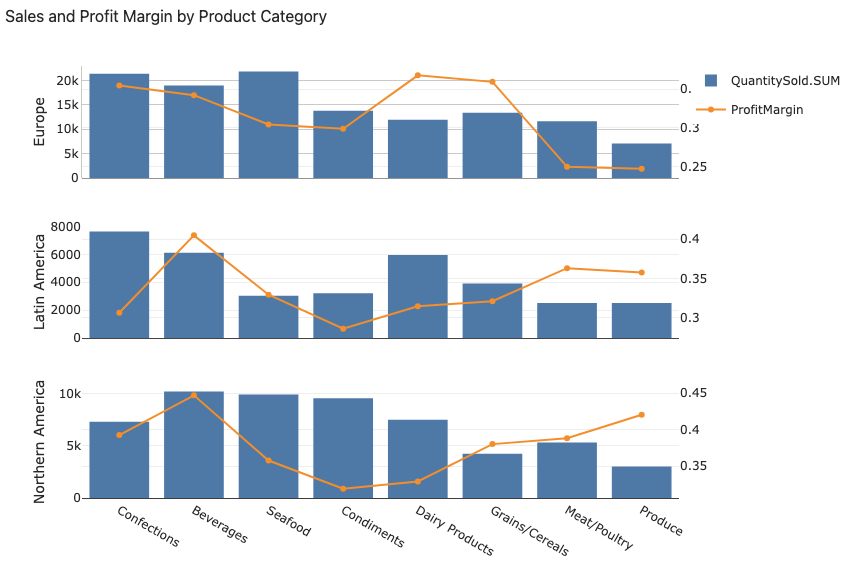

In [13]:
session.widget

As the above widget has shown, the `ProfitMargin` for Meat/Poultry is abnormally low for Europe. We will see how we can use a dashboard to investigate anomalies on the spot.

The below GIF demonstrates the steps taken to identify pricing differences across different countries:  

<img src="https://data.atoti.io/atoti-academy/images/storytelling-with-atoti/3_5_1_investigation.gif" width="1000px" />  

The steps are detailed below:  

1. Click on the below link to launch the dashboard displayed in the GIF above and navigate to the "Products" page.

In [14]:
session.link / "#/dashboard/710"

http://localhost:9094/#/dashboard/710

2. Since we are investigating the data for Europe, select "Europe" from the "Regions" quick-filter to view data related only to Europe region in the page.  

<img src="https://data.atoti.io/atoti-academy/images/storytelling-with-atoti/4_3_page_filter.png" />  

3. Under the widget "Product Sales breakdown", select "Meat/Poultry" from the `ProductCategory` filter. This allows us to focus on the data for the specific category.  

<img src="https://data.atoti.io/atoti-academy/images/storytelling-with-atoti/4_4_filter_product_cat.png" />  

5. Expand on the ProductCategory in the pivot table if it is not yet expanded. Right-click on the column header of "%ProfitContribution" and sort the column in descending order. This allows us to understand which product contributes least to the profit.  

<img src="https://data.atoti.io/atoti-academy/images/storytelling-with-atoti/4_6_sorting.png" />  

6. Right-click on the "Profit" value of the product with the lowest contribution and select "Drillthrough on \<product name\>"  
  
<img src="https://data.atoti.io/atoti-academy/images/storytelling-with-atoti/4_7_drillthrough.png" />  

7. Use the Content Editor under the Tools panel to select the relevant underlying columns for investigation. In this case, we have selected ProductName, Country along with the purchase price and selling price per unit, and the profit margin.  
  
<img src="https://data.atoti.io/atoti-academy/images/storytelling-with-atoti/4_8_content_editor.png" width="500px"/>  

8. Edit the filter of the Drillthrough widget from the content editor. Select all the Products under the Meat/Poultry category.  
  
<img src="https://data.atoti.io/atoti-academy/images/storytelling-with-atoti/4_9_modify_filter.png" width="500px"/>  

9. Check the purchase and selling price of the products. In general, the prices for _"Tourtière"_ is generally lower than other meat. This itself does not explain why the product category has much lower contribution for Europe, in comparison to other regions. However, at least we know that at the order level, the purchase price is the same — i.e. there is no hike in the cost price. The selling price at the order level however fluctuates greatly, with the order on Feb 17th costing 80% more than the order on Feb 15th.  
  
<img src="https://data.atoti.io/atoti-academy/images/storytelling-with-atoti/4_10_check_prices.png" width="75%"/>  

10. Open the Widget panel by pressing W or via the menu "Insert" > "Widgets". Add a Pivot Table to the page and build the table as shown below. 

<img src="https://data.atoti.io/atoti-academy/images/storytelling-with-atoti/4_11_build_pivot.png" width="75%"/>  

We can see that, in Switzerland and Germany, the profit margin for _"Tourtière"_ is much lower than the other European countries. Other meat such as _"Alice Mutton"_ and _"Mishi Kobe Niku"_ also had similar issue.  

To understand the issue further, we might need other supporting data to see if there is a promotional event happening, or other reasons. If proven that it is an anomaly, we should be able to bring up our profit margin by rectifying the price discrepancies. And consequently, we get an increase in our profit! 

### 📐Exercise  

The below visualization shows the Sales and Profit Margin by Product Category for each region.  

The profit Margin for Produce is exceptionally low in Europe compared to the other two regions. Perform an investigation to see if there are any anomalies.

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
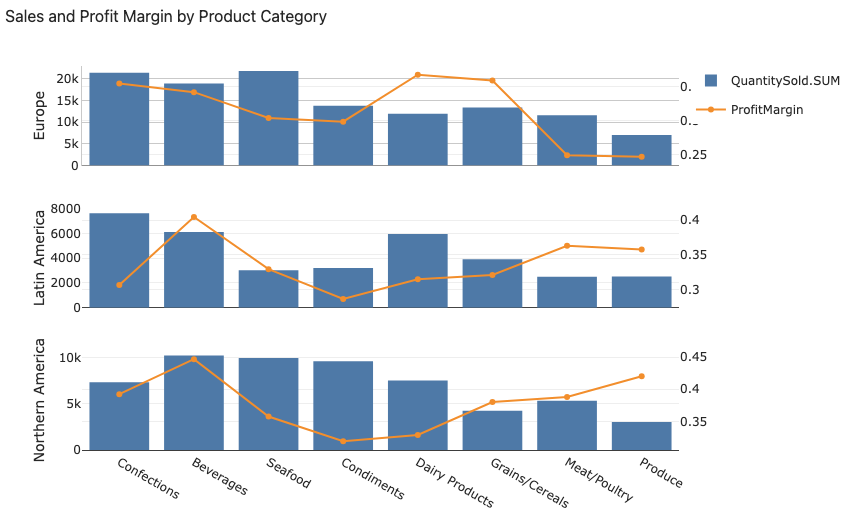

In [15]:
session.widget

### 📖 Solution  



Uncomment and execute the cell below. A few key points:

1. We can see that we are missing the selling price per unit for some products, such as the Longlife Tofu in Switzerland.  
2. The selling price of Longlife Tofu in Germany is almost half of the price in other countries.  
3. _"Rössle Sauerkraut"_ costs much lower in Germany. This, however, is understandable as it's a common product in the country compared to those in Latin America and Northern America. Therefore, it potentially has to have a more competitive pricing.  
4. The selling price of Tofu also varies greatly in Europe - the profit margin for Tofu in Poland is approximately 1/5 of the profit margin in Northern America.

In [16]:
# session.widget

## 5. Conclusion: Predict what our audience will ask next

When we present our reports and findings in person, the end is often in the form of a Q&A.
It's a good idea to prepare for the questions we think they will ask in advance so that we are not left feeling silly and looking lost for words!


The same is true for static reports, we have to be fully prepared to answer questions that the audience may have since they can't interact with the data.  With static reports, there is usually a written conclusion, or an executive summary, where this can be treated.

However, with interactive dashboards, we have different choices.
* **Filters**: Which filters can we provide to our audience so that they can investigate further on their own?  Filters can be added to a page or a whole dashboard.  
* **Time period**: How far back in time will our audience want to go?  We should create the dashboard with data from the most relevant time period already displayed.  It might, on occasion, be useful to provide more historical data (using filters, or on different pages).
* **Proof of calculations/aggregations**: How much of our proof or background calculations do we think our audience will need?  We can build this into our pages or dashboard if it's deemed necessary.

As you get to know your audience, you'll also be able to predict the kinds of questions they will ask.

<div style="text-align: center;" ><a href="https://www.atoti.io/?utm_source=gallery&utm_content=03-storytelling" target="_blank" rel="noopener noreferrer"><img src="https://data.atoti.io/notebooks/banners/Your-turn-to-try-Atoti.jpg" alt="Try atoti"></a></div>